In [1]:
#Q.1 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Number of clusters
k = 4

# Initialize KMeans with K clusters and random initialization
kmeans = KMeans(n_clusters=k, init='random', random_state=42, max_iter=10)

# Perform K-means clustering
kmeans.fit(data)

# Get the final cluster centroids
cluster_centers = kmeans.cluster_centers_

# Print the final cluster means for each cluster
for i in range(k):
    print(f"Cluster {i + 1} Mean: {cluster_centers[i]}")


C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster 1 Mean: [6.9125   3.1      5.846875 2.13125 ]
Cluster 2 Mean: [5.53214286 2.63571429 3.96071429 1.22857143]
Cluster 3 Mean: [5.006 3.428 1.462 0.246]
Cluster 4 Mean: [6.2525 2.855  4.815  1.625 ]


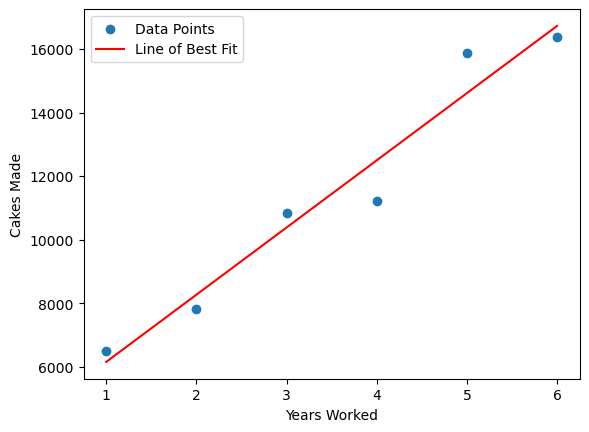

Correlation Coefficient (r): 0.9763211126242083
Predicted Cakes made after 10 years: 25185.333333333325


In [2]:
#Q.2
import numpy as np
import matplotlib.pyplot as plt

# Given data
years_worked = np.array([1, 2, 3, 4, 5, 6])
cakes_made = np.array([6500, 7805, 10835, 11230, 15870, 16387])

# Calculate the line of best fit (linear regression)
coefficients = np.polyfit(years_worked, cakes_made, 1)
line = np.polyval(coefficients, years_worked)

# Calculate correlation coefficient (r)
correlation_coefficient = np.corrcoef(years_worked, cakes_made)[0, 1]

# Plot the data points and the line of best fit
plt.scatter(years_worked, cakes_made, label='Data Points')
plt.plot(years_worked, line, color='red', label='Line of Best Fit')

# Add labels and legend
plt.xlabel('Years Worked')
plt.ylabel('Cakes Made')
plt.legend()

# Display the plot
plt.show()

# Print correlation coefficient
print(f"Correlation Coefficient (r): {correlation_coefficient}")

# Predict cakes made after 10 years using the linear regression equation
years_to_predict = 10
predicted_cakes = np.polyval(coefficients, years_to_predict)
print(f"Predicted Cakes made after 10 years: {predicted_cakes}")


In [12]:
#Q.3
import pandas as pd
import statsmodels.api as sm

try:
    # Load the data from the Excel file
    data = pd.read_excel("Stock_data.xlsx")

    # Check if the required columns exist in the DataFrame
    required_columns = ['interest_rate', 'unemployment_rate', 'stock_index_price']
    for column in required_columns:
        if column not in data.columns:
            raise ValueError(f"Column '{column}' not found in the dataset.")

    # Define the independent variables (interest_rate and unemployment_rate)
    X = data[['interest_rate', 'unemployment_rate']]

    # Add a constant term to the independent variables matrix
    X = sm.add_constant(X)

    # Define the dependent variable (stock_index_price)
    y = data['stock_index_price']

    # Fit the multiple regression model
    model = sm.OLS(y, X).fit()

    # Print the regression summary
    print(model.summary())

    # Predict stock index price for interest_rate = 3 and unemployment_rate = 5.7
    interest_rate = 3
    unemployment_rate = 5.7

    # Add a constant term and create a new data point for prediction
    new_data_point = sm.add_constant(pd.DataFrame({'interest_rate': [interest_rate], 'unemployment_rate': [unemployment_rate]}))

    # Predict the stock index price for the new data point
    predicted_stock_index_price = model.predict(new_data_point)

    print(f"Predicted Stock Index Price: {predicted_stock_index_price.values[0]}")

except Exception as e:
    print(f"An error occurred: {e}")


                            OLS Regression Results                            
Dep. Variable:      stock_index_price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     91.40
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           4.33e-11
Time:                        20:38:20   Log-Likelihood:                -134.70
No. Observations:                  24   AIC:                             275.4
Df Residuals:                      21   BIC:                             278.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.3996    902.86

In [17]:
#Q.4
import pandas as pd
import statsmodels.api as sm

# Load the data from the Excel file
data = pd.read_excel("Car_data.xlsx")

# Define the independent variables (Volume and Engine Weight)
X = data[['Volume', 'Weight']]

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Define the dependent variable (CO2 Emission)
y = data['CO2']

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Predict CO2 emission level for Volume = 1300 and Engine Weight = 3300 Kg
volume = 1300
engine_weight = 3300

# Add a constant term and create a new data point for prediction
new_data_point = pd.DataFrame({'const': [1], 'Volume': [volume], 'Weight': [engine_weight]})

# Predict the CO2 emission level for the new data point
predicted_CO2_emission = model.predict(new_data_point)

print(f"Predicted CO2 Emission Level: {predicted_CO2_emission.values[0]}")


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           0.000411
Time:                        20:46:31   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.0

In [22]:
#Q.5
# Load the data from the CSV file
data = pd.read_excel("Bank dataset 1.xlsx")

# Define features (independent variables) and target (dependent variable)
features = data.drop(columns=['Subscription'])  # Features excluding the target column
target = data['Subscription']  # Target column indicating whether a customer subscribed (1) or not (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.60
Classification Report:
              precision    recall  f1-score   support

          no       0.62      0.73      0.67        11
         yes       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



In [23]:
#Q.6
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the data from the CSV file
data = pd.read_excel("Bank data set 2.xlsx")

# Define features (independent variables) and target (dependent variable)
features = data.drop(columns=['Subscription'])  # Features excluding the target column
target = data['Subscription']  # Target column indicating whether a customer subscribed (1) or not (0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

          no       0.71      1.00      0.83         5
         yes       1.00      0.67      0.80         6

    accuracy                           0.82        11
   macro avg       0.86      0.83      0.82        11
weighted avg       0.87      0.82      0.82        11



C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


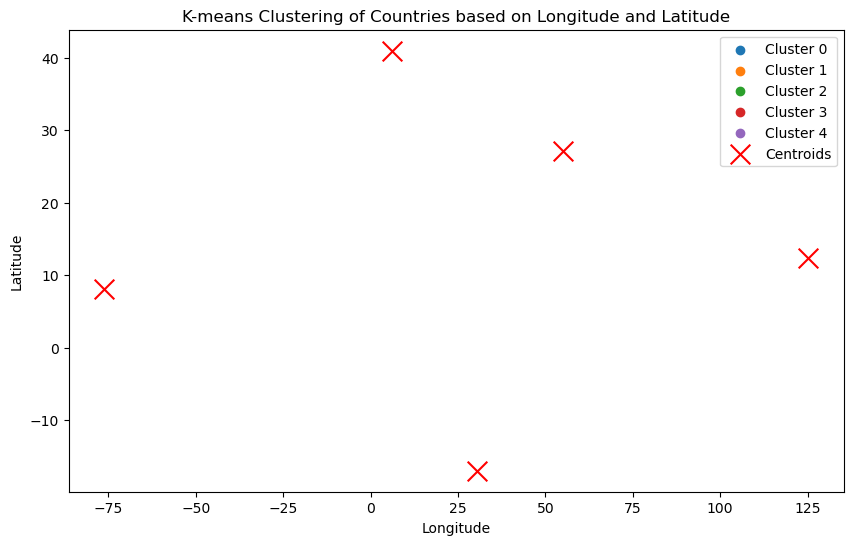

Cluster 0 Center: Longitude 6.054738712745097, Latitude 40.9608919345098
Cluster 1 Center: Longitude 54.940892114074074, Latitude 27.174188147037036
Cluster 2 Center: Longitude -76.26088121542858, Latitude 8.143420648285714
Cluster 3 Center: Longitude 30.589703323529413, Latitude -16.971901366470586
Cluster 4 Center: Longitude 125.2529470636842, Latitude 12.325681717894735


In [25]:
#Q.7
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data from the CSV file
data = pd.read_excel("Countries_dataset1.xlsx")

# Extract Longitude and Latitude columns for clustering
coordinates = data[['Longitude', 'Latitude']]

# Number of clusters (you can adjust this according to your requirement)
k = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(coordinates)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(k):
    cluster_data = data[data['name'] == cluster_num]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_num}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Countries based on Longitude and Latitude')
plt.legend()
plt.show()

# Print cluster centers (latitude and longitude) for each cluster
for cluster_num, cluster_center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {cluster_num} Center: Longitude {cluster_center[0]}, Latitude {cluster_center[1]}")


C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ISHA HOSUR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


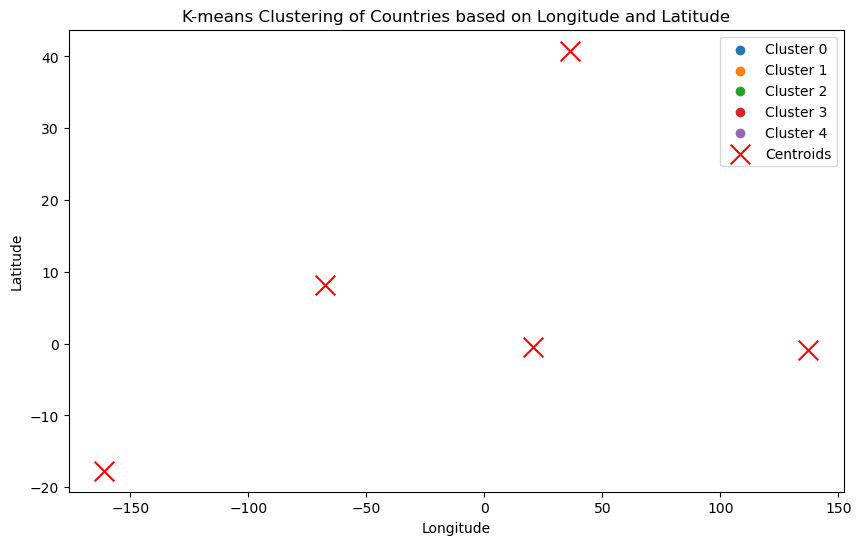

Cluster 0 Center: Longitude 36.379981735, Latitude 40.79751004961539
Cluster 1 Center: Longitude -67.66025989894737, Latitude 8.122308975789476
Cluster 2 Center: Longitude 137.29240401875, Latitude -0.8274870506250025
Cluster 3 Center: Longitude 20.5365061312, Latitude -0.44750654240000287
Cluster 4 Center: Longitude -161.23583416666665, Latitude -17.700963684999998


In [26]:
#Q.8
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data from the CSV file
data = pd.read_excel("Countries_dataset2.xlsx")

# Extract Longitude and Latitude columns for clustering
coordinates = data[['Longitude', 'Latitude']]

# Number of clusters (you can adjust this according to your requirement)
k = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(coordinates)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(k):
    cluster_data = data[data['name'] == cluster_num]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster_num}')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Countries based on Longitude and Latitude')
plt.legend()
plt.show()

# Print cluster centers (latitude and longitude) for each cluster
for cluster_num, cluster_center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {cluster_num} Center: Longitude {cluster_center[0]}, Latitude {cluster_center[1]}")


In [27]:
#Q.9
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
#Q.10
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the data from CSV
data = pd.read_csv("Social_Network_Ads1.csv")

# Encode the 'Gender' column to numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Define features and target variable
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = naive_bayes_classifier.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [33]:
#Q.11
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("Social_Network_Ads2.csv")

# Extract features (Gender, Age, EstimatedSalary) and labels (Purchased)
features = data.iloc[:, 1:4]
labels = data['Purchased']

# Encode categorical variable 'Gender' to numerical values
label_encoder = LabelEncoder()
features['Gender'] = label_encoder.fit_transform(features['Gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier with the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_classifier.predict(X_test)

# Calculate accuracy and print the results
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.8571428571428571
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.50      0.33      0.40         6

    accuracy                           0.86        42
   macro avg       0.70      0.64      0.66        42
weighted avg       0.84      0.86      0.84        42



In [ ]:
#Q.12
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("Social_Network_Ads1.csv")

# Explore the structure of the data
print("Data Structure:")
print(data.info())

# Explore the first few rows of the data
print("First Few Rows of Data:")
print(data.head())

# Feature selection and preprocessing
features = data[['Age', 'EstimatedSalary']]
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['Purchased'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the SVM classifier with the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Calculate accuracy and print the results
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
First Few Rows of Data:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
#Q.13
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("Social_Network_Ads2.csv")

# Explore the structure of the data
print("Data Structure:")
print(data.info())

# Explore the first few rows of the data
print("First Few Rows of Data:")
print(data.head())

# Feature selection and preprocessing
features = data[['Gender', 'Age', 'EstimatedSalary']]

# Encode categorical variable 'Gender' to numerical values
label_encoder = LabelEncoder()
features['Gender'] = label_encoder.fit_transform(features['Gender'])

# Target variable
labels = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can try different kernels like 'rbf', 'poly', etc.

# Train the SVM classifier with the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Calculate accuracy and print the results
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))
